**Let's Stop Wildfire Hackathon**
organized by AI For Mankind

This is a somple notebook to train a wildfire smoke classifier for Wildfire Smoke Detection Challenge 1B 

https://github.com/aiformankind/lets-stop-wildfires-hackathon/blob/master/wildfire_smoke_challenge_1B.md

**Specify the train and validate folders**

In [6]:
from google.colab import drive
drive.mount('/content/gdrive')
import os
os.chdir('/content/gdrive/My Drive/full_size_600x400')

Mounted at /content/gdrive


In [7]:
!ls

train  validate


In [8]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

# Load the TensorBoard notebook extension
%load_ext tensorboard

TensorFlow 2.x selected.


In [9]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [0]:
train_input_folder ='/content/gdrive/My Drive/full_size_600x400/train'
validate_input_folder = '/content/gdrive/My Drive/full_size_600x400/validate'


**Create train and validation splits**

In [0]:
from imutils import paths
import os
import shutil
import random

# def split_data(directory, validate_directory='validation', split=0.8): 
#   directories = [os.path.join(directory, o) for o in os.listdir(directory) 
#                     if os.path.isdir(os.path.join(directory,o))]
#   print(directories)
#   for directory in directories:
#     image_paths = list(paths.list_images(directory))
    
#     random.seed(32)
#     random.shuffle(image_paths)
#     image_paths
   
#     # compute the training and testing split
#     i = int(len(image_paths) * split)    
#     train_paths = image_paths[:i]
#     selected_for_validation_paths = image_paths[i:]
#     for path in selected_for_validation_paths:
#        category = os.path.basename(os.path.normpath(directory))
#        dest_path = os.path.join(validate_directory, category)
#        if not os.path.exists(dest_path):
#            os.makedirs(dest_path)
#        shutil.move(path, dest_path)   

**Create train and validate data generators**


In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#apply image augmentation
train_image_generator =  ImageDataGenerator(
    rescale=1. / 255,
    # shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
"""ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    brightness_range=[0.5, 1.5],
    rotation_range=40)"""
    
validate_image_generator = ImageDataGenerator(rescale=1./255)



In [38]:
batch_size = 16 #40
image_width = 400 #224
image_height = 600 #223
IMAGE_WIDTH_HEIGHT = (image_width, image_height)

class_mode = 'binary'

#create train data generator flowing from train_input_folder
train_generator = train_image_generator.flow_from_directory(
            train_input_folder,
            target_size=IMAGE_WIDTH_HEIGHT,
            batch_size=batch_size,
            class_mode=class_mode)
            
#create validation data generator flowing from validate_input_folder
validation_generator = validate_image_generator.flow_from_directory(
        validate_input_folder,
        target_size=IMAGE_WIDTH_HEIGHT,
        batch_size=batch_size,
        class_mode=class_mode)
        

Found 1074 images belonging to 2 classes.
Found 266 images belonging to 2 classes.


In [0]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
import matplotlib.pyplot as plt
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

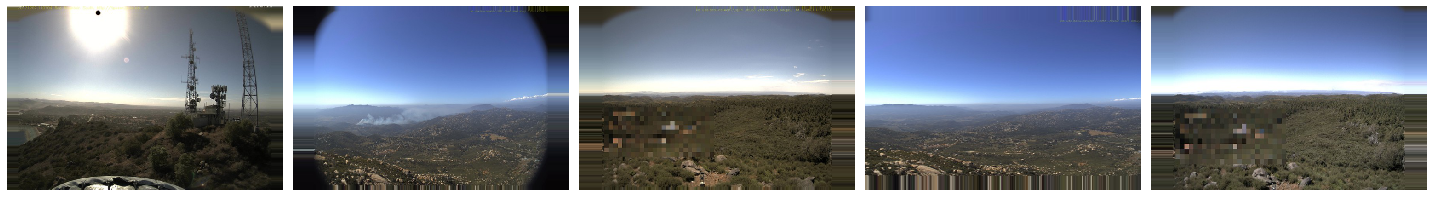

In [40]:
sample_training_images, _ = next(train_generator)
plotImages(sample_training_images[:100])

**Create custom model**

In [28]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras import backend as K

img_input = layers.Input(shape=(image_width, image_height, 3))
input_shape = (image_width, image_height, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

"""
total_classes = 1
activation_function = 'sigmoid'
loss = 'binary_crossentropy'
img_input = layers.Input(shape=(image_width, image_height, 3))

x = layers.Conv2D(32, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Flatten()(x)

x = layers.Dense(512, activation='relu')(x)

x = layers.Dropout(0.5)(x)

output = layers.Dense(total_classes, activation= activation_function)(x)

model = Model(img_input, output)

model.compile(loss=loss,
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])"""

"\ntotal_classes = 1\nactivation_function = 'sigmoid'\nloss = 'binary_crossentropy'\nimg_input = layers.Input(shape=(image_width, image_height, 3))\n\nx = layers.Conv2D(32, 3, activation='relu')(img_input)\nx = layers.MaxPooling2D(2)(x)\n\nx = layers.Conv2D(64, 3, activation='relu')(x)\nx = layers.MaxPooling2D(2)(x)\n\nx = layers.Flatten()(x)\n\nx = layers.Dense(512, activation='relu')(x)\n\nx = layers.Dropout(0.5)(x)\n\noutput = layers.Dense(total_classes, activation= activation_function)(x)\n\nmodel = Model(img_input, output)\n\nmodel.compile(loss=loss,\n              optimizer=Adam(lr=0.001),\n              metrics=['accuracy'])"

**Start model training**

In [41]:
import datetime, os
import tensorflow as tf

epochs = 20
steps_per_epoch = train_generator.n // train_generator.batch_size
validation_steps = validation_generator.n // validation_generator.batch_size

logdir = os.path.join("tf_logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

history = model.fit_generator(
      train_generator,
      steps_per_epoch=steps_per_epoch,
      validation_data=validation_generator,
      validation_steps=validation_steps,
      epochs=epochs,
      callbacks=[tensorboard_callback])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 67 steps, validate for 16 steps
Epoch 1/20
67/67 [==============================] - 57s 853ms/step - loss: 0.6603 - accuracy: 0.5614 - val_loss: 0.6078 - val_accuracy: 0.6328
Epoch 2/20
67/67 [==============================] - 57s 851ms/step - loss: 0.6634 - accuracy: 0.5766 - val_loss: 0.6791 - val_accuracy: 0.5547
Epoch 3/20
67/67 [==============================] - 56s 837ms/step - loss: 0.6607 - accuracy: 0.5955 - val_loss: 0.6712 - val_accuracy: 0.5977
Epoch 4/20
67/67 [==============================] - 56s 833ms/step - loss: 0.6287 - accuracy: 0.5870 - val_loss: 0.6080 - val_accuracy: 0.6094
Epoch 5/20
67/67 [==============================] - 55s 823ms/step - loss: 0.6737 - accuracy: 0.5992 - val_loss: 0.6142 - val_accuracy: 0.6133
Epoch 6/20
56/67 [========================>.....] - ETA: 8s - loss: 0.6205 - accuracy: 0.6352

KeyboardInterrupt: ignored

Text(0.5, 0, 'epoch')

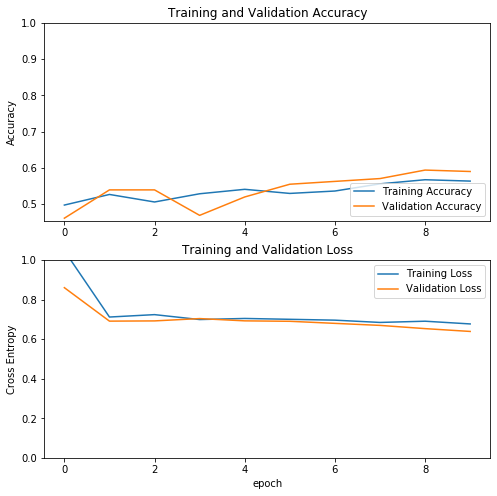

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()), 1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0, 1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')

In [0]:
%tensorboard --logdir tf_logs
